# Covid-19 symptoms Prediction with Machine Learning

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
Covid = pd.read_csv('covid-19_symptomsv1.csv')


#### To get the First 5 of the data frame


In [3]:
Covid.head()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,102,0,9,0,-1,0
1,102,0,10,0,0,1
2,104,0,33,1,-1,0
3,101,1,59,0,1,0
4,99,0,98,0,0,0


#### To get the last 5 of the data frame

In [4]:
Covid.tail()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
2570,99,0,90,0,0,1
2571,100,0,53,0,-1,1
2572,101,0,44,1,0,0
2573,102,0,97,0,-1,1
2574,104,1,62,1,-1,1


In [5]:
Covid.index

RangeIndex(start=0, stop=2575, step=1)

## Check data for missing data before putting for model prediction

In [6]:
Covid.isnull().sum()

fever            0
bodyPain         0
age              0
runnyNose        0
diffBreath       0
infectionProb    0
dtype: int64

In [7]:
Covid.dtypes

fever            int64
bodyPain         int64
age              int64
runnyNose        int64
diffBreath       int64
infectionProb    int64
dtype: object

In [8]:
Covid=Covid.drop(['bodyPain'], axis = 1)
Covid.head()

,fever,age,runnyNose,diffBreath,infectionProb
0,102,9,0,-1,0
1,102,10,0,0,1
2,104,33,1,-1,0
3,101,59,0,1,0
4,99,98,0,0,0


### Slicing the data frame in pythons

In [9]:
Cov = Covid.iloc[:, :-1]
IID = Covid.iloc[:, -1]

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Cov, IID)

C:\Users\Adrian\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

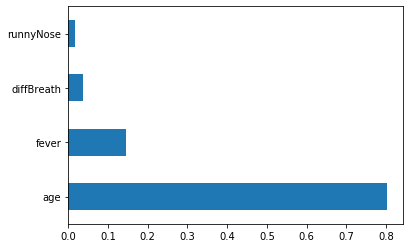

In [11]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Cov.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

#### From the feature importance score visualization show that top 3 attributes will be age, fever and difficulty in breathing.

### Feature Importance with Random Forest

In [12]:
data = Covid.copy()

In [13]:
data

,fever,age,runnyNose,diffBreath,infectionProb
0,102,9,0,-1,0
1,102,10,0,0,1
2,104,33,1,-1,0
3,101,59,0,1,0
4,99,98,0,0,0
...,...,...,...,...,...
2570,99,90,0,0,1
2571,100,53,0,-1,1
2572,101,44,1,0,0
2573,102,97,0,-1,1


In [14]:
X = Covid.iloc[:, :-1]
y = Covid.iloc[:, -1]

In [15]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

In [16]:
#define dataset
X, y = make_classification(n_samples=3000, n_features=5, n_informative=5, n_redundant=0, random_state=1)

In [17]:
# define the model
model = RandomForestClassifier()

Feature: 0, Score: 0.22931
Feature: 1, Score: 0.27271
Feature: 2, Score: 0.15591
Feature: 3, Score: 0.25721
Feature: 4, Score: 0.08485


C:\Users\Adrian\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


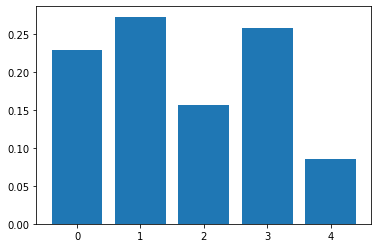

In [18]:
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [19]:
# iterating the columns
for col in data.columns:
    print(col)

fever
age
runnyNose
diffBreath
infectionProb


## Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# 80% training and 20% test

In [21]:
from sklearn.model_selection import train_test_split
X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size = 0.2, random_state = 1)
# 80% training and 20% test

In [22]:
print(X_train)

[[-1.37870858 -0.63811721 -1.34367555  2.92697113  0.15218052]
 [ 0.66913503  0.38432675  0.15076389 -0.23818318  1.52254687]
 [-1.74604767 -0.69882252 -0.64509743  2.10441559  0.46004651]
 ...
 [ 1.47480111 -0.05557262  0.51746485  0.90397732  3.58950414]
 [ 0.39680747  0.04019885 -0.2918027   0.81338619  0.40562156]
 [-3.20601442 -2.31501597 -1.98712428 -1.52291923  1.43573597]]


In [23]:
print(X_trainT)

[[-1.37870858 -0.63811721 -1.34367555  2.92697113  0.15218052]
 [ 0.66913503  0.38432675  0.15076389 -0.23818318  1.52254687]
 [-1.74604767 -0.69882252 -0.64509743  2.10441559  0.46004651]
 ...
 [ 1.47480111 -0.05557262  0.51746485  0.90397732  3.58950414]
 [ 0.39680747  0.04019885 -0.2918027   0.81338619  0.40562156]
 [-3.20601442 -2.31501597 -1.98712428 -1.52291923  1.43573597]]


In [24]:
print(X_test)

[[ 1.07121852 -1.14268798  0.81291798  1.73138598 -0.72636562]
 [-0.15047548 -2.28479151  0.53012276  1.65214698 -1.52708877]
 [ 0.447258   -0.96839654  0.06495303  1.71233269  0.14187108]
 ...
 [-3.5682098  -1.33623431 -1.23529101  2.1563699  -0.68282515]
 [-1.54119925  0.88565405 -0.37634731  0.86226088  1.58795501]
 [ 1.10360836  0.75010538 -2.79574733  1.60653487 -0.57650822]]


In [25]:
print(y_train)

[1 0 1 ... 0 0 1]


In [26]:
print(y_test)

[0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1
 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0
 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1
 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1
 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0
 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0
 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0
 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 

## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :-1] = sc.fit_transform(X_train[:, :-1])
X_test[:, :-1] = sc.transform(X_test[:, :-1])

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainT[:, :-1] = sc.fit_transform(X_trainT[:, :-1])
X_testT[:, :-1] = sc.transform(X_testT[:, :-1])

In [29]:
X_train[:, :-1] 

array([[-0.54206683, -0.09819818, -0.85264828,  1.64838076],
       [ 0.72590293,  0.65951842,  0.09357351, -0.50804717],
       [-0.76951333, -0.1431859 , -0.41033538,  1.08797152],
       ...,
       [ 1.22474973,  0.33351614,  0.32575451,  0.27010977],
       [ 0.55728502,  0.40449082, -0.1866427 ,  0.20838979],
       [-1.67348554, -1.3409206 , -1.26005537, -1.38334122]])

In [30]:
X_train

array([[-0.54206683, -0.09819818, -0.85264828,  1.64838076,  0.15218052],
       [ 0.72590293,  0.65951842,  0.09357351, -0.50804717,  1.52254687],
       [-0.76951333, -0.1431859 , -0.41033538,  1.08797152,  0.46004651],
       ...,
       [ 1.22474973,  0.33351614,  0.32575451,  0.27010977,  3.58950414],
       [ 0.55728502,  0.40449082, -0.1866427 ,  0.20838979,  0.40562156],
       [-1.67348554, -1.3409206 , -1.26005537, -1.38334122,  1.43573597]])

In [31]:
print(X_train)

[[-0.54206683 -0.09819818 -0.85264828  1.64838076  0.15218052]
 [ 0.72590293  0.65951842  0.09357351 -0.50804717  1.52254687]
 [-0.76951333 -0.1431859  -0.41033538  1.08797152  0.46004651]
 ...
 [ 1.22474973  0.33351614  0.32575451  0.27010977  3.58950414]
 [ 0.55728502  0.40449082 -0.1866427   0.20838979  0.40562156]
 [-1.67348554 -1.3409206  -1.26005537 -1.38334122  1.43573597]]


In [32]:
print(X_test)

[[ 0.97486223 -0.47212738  0.51282411  0.83382546 -0.72636562]
 [ 0.21842212 -1.31852174  0.33376901  0.77983972 -1.52708877]
 [ 0.58852264 -0.34296283  0.03924136  0.82084441  0.14187108]
 ...
 [-1.89774719 -0.61556142 -0.78402335  1.12336812 -0.68282515]
 [-0.6426767   1.03104393 -0.24017311  0.24168825  1.58795501]
 [ 0.99491715  0.93059101 -1.7720445   0.74876407 -0.57650822]]


## Model Classifications

In [33]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

## Random Forest Accuracy

In [34]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.945


## Decision Tree Classifications

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_trainT, y_trainT)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [36]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_trainT,y_trainT)

#Predict the response for test dataset
y_predT = clf.predict(X_testT)

In [37]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_testT, y_predT)  

In [38]:
cm

array([[287,  29],
       [ 31, 253]], dtype=int64)

In [39]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testT, y_predT))

Accuracy: 0.9
